<a href="https://colab.research.google.com/github/Gugan1234/CodeClouse_Internship/blob/main/movie_genere_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
from sklearn import metrics
from wordcloud import WordCloud
from nltk.corpus import stopwords
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
df = pd.read_csv('wiki_movie_plots_deduped.csv')

In [ ]:
df.head(10)

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot
0,1901,Kansas Saloon Smashers,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"A bartender is working at a saloon, serving dr..."
1,1901,Love by the Light of the Moon,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"The moon, painted with a smiling face hangs ov..."
2,1901,The Martyred Presidents,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"The film, just over a minute long, is composed..."
3,1901,"Terrible Teddy, the Grizzly King",American,Unknown,NaN,unknown,"https://en.wikipedia.org/wiki/Terrible_Teddy,_...",Lasting just 61 seconds and consisting of two ...
4,1902,Jack and the Beanstalk,American,"George S. Fleming, Edwin S. Porter",NaN,unknown,https://en.wikipedia.org/wiki/Jack_and_the_Bea...,The earliest known adaptation of the classic f...
5,1903,Alice in Wonderland,American,Cecil Hepworth,May Clark,unknown,https://en.wikipedia.org/wiki/Alice_in_Wonderl...,"Alice follows a large white rabbit down a ""Rab..."
6,1903,The Great Train Robbery,American,Edwin S. Porter,NaN,western,https://en.wikipedia.org/wiki/The_Great_Train_...,The film opens with two bandits breaking into ...
7,1904,The Suburbanite,American,Wallace McCutcheon,NaN,comedy,https://en.wikipedia.org/wiki/The_Suburbanite,The film is about a family who move to the sub...
8,1905,The Little Train Robbery,American,Edwin Stanton Porter,NaN,unknown,https://en.wikipedia.org/wiki/The_Little_Train...,The opening scene shows the interior of the ro...
9,1905,The Night Before Christmas,American,Edwin Stanton Porter,NaN,unknown,https://en.wikipedia.org/wiki/The_Night_Before...,Scenes are introduced using lines of the poem....


In [ ]:
print(df.shape)

(4236, 8)


In [ ]:
new_df = df[(df.Genre == 'comedy') | (df.Genre == 'drama')]

In [ ]:
new_df.head(10)

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot
7,1904,The Suburbanite,American,Wallace McCutcheon,NaN,comedy,https://en.wikipedia.org/wiki/The_Suburbanite,The film is about a family who move to the sub...
14,1907,How Brown Saw the Baseball Game,American,Unknown,Unknown,comedy,https://en.wikipedia.org/wiki/How_Brown_Saw_th...,Before heading out to a baseball game at a nea...
15,1907,Laughing Gas,American,Edwin Stanton Porter,"Bertha Regustus, Edward Boulden",comedy,https://en.wikipedia.org/wiki/Laughing_Gas_(fi...,The plot is that of a black woman going to the...
16,1908,The Adventures of Dollie,American,D. W. Griffith,"Arthur V. Johnson, Linda Arvidson",drama,https://en.wikipedia.org/wiki/The_Adventures_o...,On a beautiful summer day a father and mother ...
17,1908,The Black Viper,American,D. W. Griffith,D. W. Griffith,drama,https://en.wikipedia.org/wiki/The_Black_Viper,A thug accosts a girl as she leaves her workpl...
18,1908,A Calamitous Elopement,American,D.W. Griffith,"Harry Solter, Linda Arvidson",comedy,https://en.wikipedia.org/wiki/A_Calamitous_Elo...,A young couple decides to elope after being ca...
20,1908,A Christmas Carol,American,Unknown,Tom Ricketts,drama,https://en.wikipedia.org/wiki/A_Christmas_Caro...,No prints of the first American film adaptatio...
22,1909,At the Altar,American,D. W. Griffith,Marion Leonard,drama,https://en.wikipedia.org/wiki/At_the_Altar,A rejected admirer sets up a trap to kill his ...
23,1909,A Drunkard's Reformation,American,D. W. Griffith,Arthur V. Johnson,drama,https://en.wikipedia.org/wiki/A_Drunkard%27s_R...,"John Wharton, the husband of a true and trusti..."
24,1909,The Golden Louis,American,D. W. Griffith,NaN,drama,https://en.wikipedia.org/wiki/The_Golden_Louis,An old woman sends a girl begging in the stree...


(1963, 8)

In [ ]:
new_df1 = df[(df.Genre == 'unknown') | (df.Genre == 'comedy')]

In [ ]:
new_df1

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot
0,1901,Kansas Saloon Smashers,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"A bartender is working at a saloon, serving dr..."
1,1901,Love by the Light of the Moon,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"The moon, painted with a smiling face hangs ov..."
2,1901,The Martyred Presidents,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"The film, just over a minute long, is composed..."
3,1901,"Terrible Teddy, the Grizzly King",American,Unknown,NaN,unknown,"https://en.wikipedia.org/wiki/Terrible_Teddy,_...",Lasting just 61 seconds and consisting of two ...
4,1902,Jack and the Beanstalk,American,"George S. Fleming, Edwin S. Porter",NaN,unknown,https://en.wikipedia.org/wiki/Jack_and_the_Bea...,The earliest known adaptation of the classic f...
...,...,...,...,...,...,...,...,...
4219,1943,Henry Aldrich Gets Glamour,American,Hugh Bennett,"Jimmy Lydon, Olive Blakeney",comedy,https://en.wikipedia.org/wiki/Henry_Aldrich_Ge...,Henry Aldrich becomes the most sought after gu...
4221,1943,Hi Diddle Diddle,American,Andrew L. Stone,"Adolphe Menjou, Martha Scott, Dennis O'Keefe",comedy,https://en.wikipedia.org/wiki/Hi_Diddle_Diddle,Young Janie Prescott is about to be married to...
4223,1943,His Butler's Sister,American,Frank Borzage,"Deanna Durbin, Franchot Tone",comedy,https://en.wikipedia.org/wiki/His_Butler%27s_S...,Written by Samuel Hoffenstein and Elizabeth Re...
4224,1943,Hit the Ice,American,Charles Lamont,Abbott and Costello,comedy,https://en.wikipedia.org/wiki/Hit_the_Ice_(film),"Two sidewalk photographers, Tubby McCoy (Lou C..."


Text(0.5, 1.0, 'Distribution of drama/comedy')

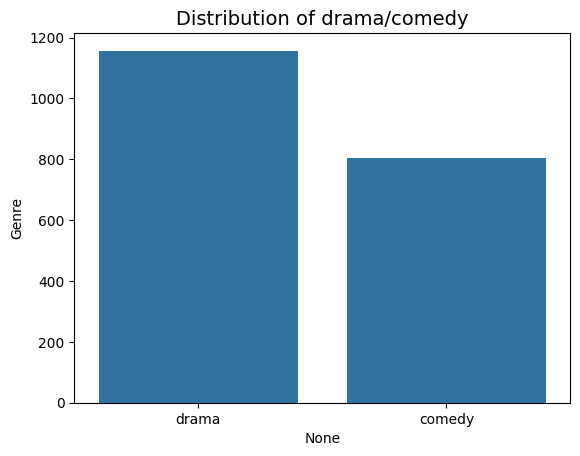

In [ ]:
import matplotlib.pyplot as plt
class_names = ['drama', 'comedy']
label_count = new_df.Genre.value_counts()
sns.barplot(x=label_count.index, y=label_count)
plt.title('Distribution of drama/comedy',fontsize =14)

Text(0.5, 1.0, 'Distribution of unknown/comedy')

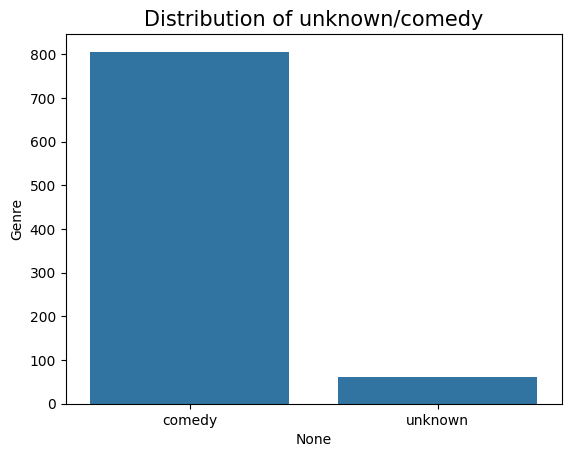

In [ ]:
class_name1 = ['unknown', 'comedy']
label_count1 = new_df1.Genre.value_counts()
sns.barplot(x = label_count1.index, y = label_count1)
plt.title('Distribution of unknown/comedy', fontsize = 15)

In [54]:
df.isna().sum()

Release Year         0
Title                0
Origin/Ethnicity     0
Director             0
Cast                47
Genre                0
Wiki Page            0
Plot                 0
dtype: int64

In [56]:
df['Genre'].unique()

array(['unknown', 'western', 'comedy', 'short',
       'short action/crime western', 'short film', 'biographical',
       'drama', 'adventure', 'short fantasy', 'silent sports', 'horror',
       'crime', 'drama, horror', 'historical drama', 'fantasy drama',
       'biographical drama', 'documentary drama', 'fantasy',
       'adventure serial', 'epic', 'historical', 'comedy short',
       'comedy, western', 'biography', 'action adventure',
       'western drama', 'short comedy', 'comedy–drama', 'romantic drama',
       'mystery', 'crime drama', 'romance',
       'sexual hygiene/exploitation film', 'comedy drama', 'war drama',
       'spy', 'romantic comedy', 'propaganda', 'ww1 propaganda', 'biopic',
       'animated series', 'drama romance', 'melodrama', 'period drama',
       'swashbuckler', 'romance drama', 'drama, adventure',
       'crime comedy', 'documentary', 'comedy western', 'fantasy, family',
       'war', 'comedy, adventure', 'fantasy, adventure', 'thriller',
       'dramatic

In [57]:
encode_genre = {'unknown':0, 'western':1, 'comedy':2, 'short':3,
       'short action/crime western':4, 'short film':5, 'biographical':6,
       'drama':7, 'adventure':8, 'short fantasy':9, 'silent sports':10, 'horror':11}

In [59]:
df['Genre']=df['Genre'].map(encode_genre)

In [60]:
df.head(5)

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot
0,1901,Kansas Saloon Smashers,American,Unknown,NaN,0.0,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"A bartender is working at a saloon, serving dr..."
1,1901,Love by the Light of the Moon,American,Unknown,NaN,0.0,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"The moon, painted with a smiling face hangs ov..."
2,1901,The Martyred Presidents,American,Unknown,NaN,0.0,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"The film, just over a minute long, is composed..."
3,1901,"Terrible Teddy, the Grizzly King",American,Unknown,NaN,0.0,"https://en.wikipedia.org/wiki/Terrible_Teddy,_...",Lasting just 61 seconds and consisting of two ...
4,1902,Jack and the Beanstalk,American,"George S. Fleming, Edwin S. Porter",NaN,0.0,https://en.wikipedia.org/wiki/Jack_and_the_Bea...,The earliest known adaptation of the classic f...


In [62]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [63]:
corpus = []

In [68]:
df['Plot'][0]

"A bartender is working at a saloon, serving drinks to customers. After he fills a stereotypically Irish man's bucket with beer, Carrie Nation and her followers burst inside. They assault the Irish man, pulling his hat over his eyes and then dumping the beer over his head. The group then begin wrecking the bar, smashing the fixtures, mirrors, and breaking the cash register. The bartender then sprays seltzer water in Nation's face before a group of policemen appear and order everybody to leave.[1]"

In [70]:
re.sub(pattern='[^a-zA-Z]', repl='', string=df['Plot'][0])

'AbartenderisworkingatasaloonservingdrinkstocustomersAfterhefillsastereotypicallyIrishmansbucketwithbeerCarrieNationandherfollowersburstinsideTheyassaulttheIrishmanpullinghishatoverhiseyesandthendumpingthebeeroverhisheadThegroupthenbeginwreckingthebarsmashingthefixturesmirrorsandbreakingthecashregisterThebartenderthenspraysseltzerwaterinNationsfacebeforeagroupofpolicemenappearandordereverybodytoleave'

In [71]:
re.sub(pattern='[^a-zA-Z]', repl='', string=df['Plot'][0]).lower()

'abartenderisworkingatasaloonservingdrinkstocustomersafterhefillsastereotypicallyirishmansbucketwithbeercarrienationandherfollowersburstinsidetheyassaulttheirishmanpullinghishatoverhiseyesandthendumpingthebeeroverhisheadthegroupthenbeginwreckingthebarsmashingthefixturesmirrorsandbreakingthecashregisterthebartenderthenspraysseltzerwaterinnationsfacebeforeagroupofpolicemenappearandordereverybodytoleave'

In [73]:
for i in range(0,df.shape[0]):
  Plot =  re.sub(pattern='[^a-zA-Z]', repl='', string=df['Plot'][0])
  Plot = Plot.lower()
  words = Plot.split()
  cleaned_words = [word for word in words if not word in set(stopwords.words('english'))]
  ps = PorterStemmer()
  words = [ps.stem(word) for word in cleaned_words]
  Plot = ''.join(words)
  corpus.append(Plot)

In [74]:
corpus[0]


'abartenderisworkingatasaloonservingdrinkstocustomersafterhefillsastereotypicallyirishmansbucketwithbeercarrienationandherfollowersburstinsidetheyassaulttheirishmanpullinghishatoverhiseyesandthendumpingthebeeroverhisheadthegroupthenbeginwreckingthebarsmashingthefixturesmirrorsandbreakingthecashregisterthebartenderthenspraysseltzerwaterinnationsfacebeforeagroupofpolicemenappearandordereverybodytoleav'

In [76]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=10000,ngram_range=(1,2))
x = cv.fit_transform(corpus).toarray()
y = df['Genre'].values


In [91]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=0)


In [92]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB(alpha=0.1)


In [100]:
y_train = y_train.fillna(y_train.mean())

In [102]:
print(y_train.dtype)

float64


In [103]:
print(y_train.value_counts)

<bound method IndexOpsMixin.value_counts of 0       4.711164
1       4.711164
2       8.000000
3       4.711164
4       7.000000
          ...   
2960    7.000000
2961    1.000000
2962    8.000000
2963    4.711164
2964    4.711164
Length: 2965, dtype: float64>


In [104]:
y_train = y_train.astype(int)

In [105]:
classifier.fit(x_train, y_train)

MultinomialNB(alpha=0.1)

In [94]:
missing_values = pd.isnull(y_train).sum()
print(f"Number of missing values in y_train: {missing_values}")

Number of missing values in y_train: 1272


In [107]:
y_pred = classifier.predict(x_test)
y_pred


array([4, 4, 4, ..., 4, 4, 4])

In [110]:
from sklearn.metrics import confusion_matrix


In [114]:
import pandas as pd
pd.DataFrame(y_test).describe()

,0
count,723.000000
mean,4.633472
std,2.814158
min,0.000000
25%,2.000000
50%,7.000000
75%,7.000000
max,11.000000


In [116]:
import numpy as np
np.count_nonzero(np.isnan(y_test))

548

In [125]:
y_test = pd.Series(y_test)
y_test=y_test.fillna(y_test.mean())

In [140]:
cm = confusion_matrix(y_test, y_pred)

In [127]:
y_test.head()

0    2.0
1    2.0
2    2.0
3    2.0
4    1.0
dtype: float64

In [128]:
print(y_test.dtype)

float64


In [129]:
print(y_test.value_counts)

<bound method IndexOpsMixin.value_counts of 0       2.000000
1       2.000000
2       2.000000
3       2.000000
4       1.000000
          ...   
1266    4.633472
1267    1.000000
1268    8.000000
1269    4.633472
1270    2.000000
Length: 1271, dtype: float64>


In [130]:
y_test = y_test.astype(int)

In [131]:
y_test.head()

0    2
1    2
2    2
3    2
4    1
dtype: int64

In [132]:
cm = confusion_matrix(y_test, y_pred)

In [134]:
cm

array([[  0,   0,   0,   0,  14,   0,   0,   0,   0],
       [  0,   0,   0,   0,  73,   0,   0,   0,   0],
       [  0,   0,   0,   0, 249,   0,   0,   0,   0],
       [  0,   0,   0,   0,   1,   0,   0,   0,   0],
       [  0,   0,   0,   0, 548,   0,   0,   0,   0],
       [  0,   0,   0,   0, 347,   0,   0,   0,   0],
       [  0,   0,   0,   0,  27,   0,   0,   0,   0],
       [  0,   0,   0,   0,   1,   0,   0,   0,   0],
       [  0,   0,   0,   0,  11,   0,   0,   0,   0]])

<Axes: >

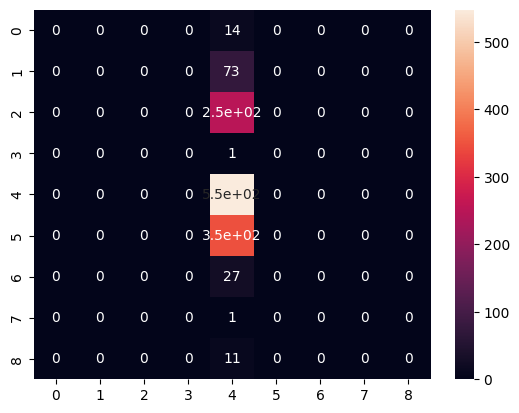

In [135]:
import seaborn as sns
sns.heatmap(cm, annot=True)

In [136]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.4311565696302124

In [137]:
import pickle

In [138]:
pickle.dump(cv, open('cv.pkl', 'wb'))

In [139]:
pickle.dump(classifier, open('model.pkl', 'wb'))